<style>
.shaded-cell {
    background-color: #f0f4f8 !important;
    padding: 15px !important;
    border-radius: 8px !important;
     border-left: 5px solid #3498db
}
</style>

<h1>🚢 Titanic Survival Analysis ~ Using Normalization</h1>

<h4 style="color:#555; margin-top:-8px;">
Exploratory Data Analysis of Passenger Demographics and Survival Outcomes
</h4>

<hr style="border:1px solid #ddd;">


**Competition:** Titanic: Machine Learning from Disaster  
**File Used:** `train.csv`  
**Dataset Source:** Kaggle  
https://www.kaggle.com/competitions/titanic/data


<div style="background-color:#fff9c4; padding:16px; border-radius:8px; border-left:5px solid #fbc02d;">

<h3>📘 Background & Objective</h3>

<p>
This notebook presents an exploratory data analysis (EDA) of the Titanic passenger dataset with the goal of identifying patterns and factors associated with passenger survival.
</p>

<p>
The dataset includes demographic, socioeconomic, and travel-related attributes for individuals aboard the Titanic. The analysis begins with an initial inspection of the dataset to understand its structure, completeness, and data quality. Necessary preprocessing steps are applied to handle missing values and remove non-informative attributes.
</p>

<p>
Visual and statistical exploration is then used to examine relationships between key features and survival outcomes, providing insights into variables that may have influenced survival during the disaster.
</p>

</div>


## 🔍 Key Questions Explored

- How does passenger class influence survival outcomes?
- Are there differences in survival rates by gender and age?
- Does embarkation port show meaningful variation in survival?

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Data Overview & Structure </h3>
</div>

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
import time 

In [3]:
df = pd.read_csv("train.csv") 
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
By observing the dataset, I noticed that there are 891 entries with 12 total columns.
</div>


In [5]:
df.head(3) 
df.tail(3)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Age information is available for 714 of the 891 passengers, with an average age of approximately 30 years and a maximum recorded age of 80. Fare values range from 0 to 512, indicating the presence of at least one passenger with a zero or unrecorded fare.
</div>


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Identifying Data Quality Issues </h3>
</div>

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
(df.isnull().mean() * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<strong>Technical Note:</strong>
During the initial analysis, the cabin attribute was found to be missing for 687 out of 891 passengers. Given the high proportion of missing values, this attribute—along with name, ticket, and passenger_id—was excluded from further analysis. A cleaned dataset was stored in df_clean for subsequent exploration. </div>

In [8]:
df_clean = df.copy()
df_clean.columns = df_clean.columns.str.strip().str.lower()
df_clean.drop(columns=['passengerid', 'ticket', 'cabin', 'name'], inplace=True)
df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

## 🧹 Data Cleaning Summary

- Removed non-informative identifiers (Name, Ticket, PassengerId).
- Dropped Cabin due to a high proportion of missing values.
- Imputed missing age values using gender-based median imputation.
- Handled missing embarkation values via random assignment from existing categories.

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Data Preprocessing  </h3>
</div>

In [11]:
print("Original DataFrame:")
print(df_clean)
print("\n")

le = LabelEncoder()

df_clean['sex_encoded'] = le.fit_transform(df_clean['sex'])
df_clean['embarked_encoded'] = le.fit_transform(df_clean['embarked'])
print("DataFrame after Label Encoding:")
df_clean.head(5)



Original DataFrame:
     survived  pclass     sex   age  sibsp  parch     fare embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


DataFrame after Label Encoding:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_encoded,embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [12]:
df_clean.drop(columns=['sex', 'embarked'],inplace=True)
df_clean

,survived,pclass,age,sibsp,parch,fare,sex_encoded,embarked_encoded
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,NaN,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


In [13]:
df_clean.rename(columns={'sex_encoded': 'sex','embarked_encoded':'embarked'}, inplace=True)
df_clean

,survived,pclass,age,sibsp,parch,fare,sex,embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,NaN,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


In [14]:
df_clean['age'] = df_clean['age'].fillna(df_clean.groupby('sex')['age'].transform('median'))
df_clean['age'].isnull().sum()

np.int64(0)

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Scaling the Training Data Frames </h3>
</div>

In [15]:
scaler = StandardScaler() 
scaler.fit(df_clean) 
X_train_scaled = scaler.transform(df_clean) 

In [16]:
scaler.mean_

array([ 0.38383838,  2.30864198, 29.44126824,  0.52300786,  0.38159371,
       32.20420797,  0.64758698,  1.53872054])

In [17]:
X_train_scaled
df_scaled = pd.DataFrame(X_train_scaled, columns = df_clean.columns) 

In [18]:
np.round(df_clean.describe(),1) 

,survived,pclass,age,sibsp,parch,fare,sex,embarked
count,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
mean,0.4,2.3,29.4,0.5,0.4,32.2,0.6,1.5
std,0.5,0.8,13.0,1.1,0.8,49.7,0.5,0.8
min,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0
25%,0.0,2.0,22.0,0.0,0.0,7.9,0.0,1.0
50%,0.0,3.0,29.0,0.0,0.0,14.5,1.0,2.0
75%,1.0,3.0,35.0,1.0,0.0,31.0,1.0,2.0
max,1.0,3.0,80.0,8.0,6.0,512.3,1.0,3.0


In [19]:
np.round(df_scaled.describe(),1) 

,survived,pclass,age,sibsp,parch,fare,sex,embarked
count,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
mean,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.8,-1.6,-2.2,-0.5,-0.5,-0.6,-1.4,-1.9
25%,-0.8,-0.4,-0.6,-0.5,-0.5,-0.5,-1.4,-0.7
50%,-0.8,0.8,-0.0,-0.5,-0.5,-0.4,0.7,0.6
75%,1.3,0.8,0.4,0.4,-0.5,-0.0,0.7,0.6
max,1.3,0.8,3.9,6.8,7.0,9.7,0.7,1.8


<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> Age Distribution Analysis </h3>
</div>

Before Scaling - Mean Age: 29.441268237934903 Std Dev:  13.018747116356971
After Scaling - Mean Age: 1.395566540494024e-16 Std Dev:  1.0005616400330457


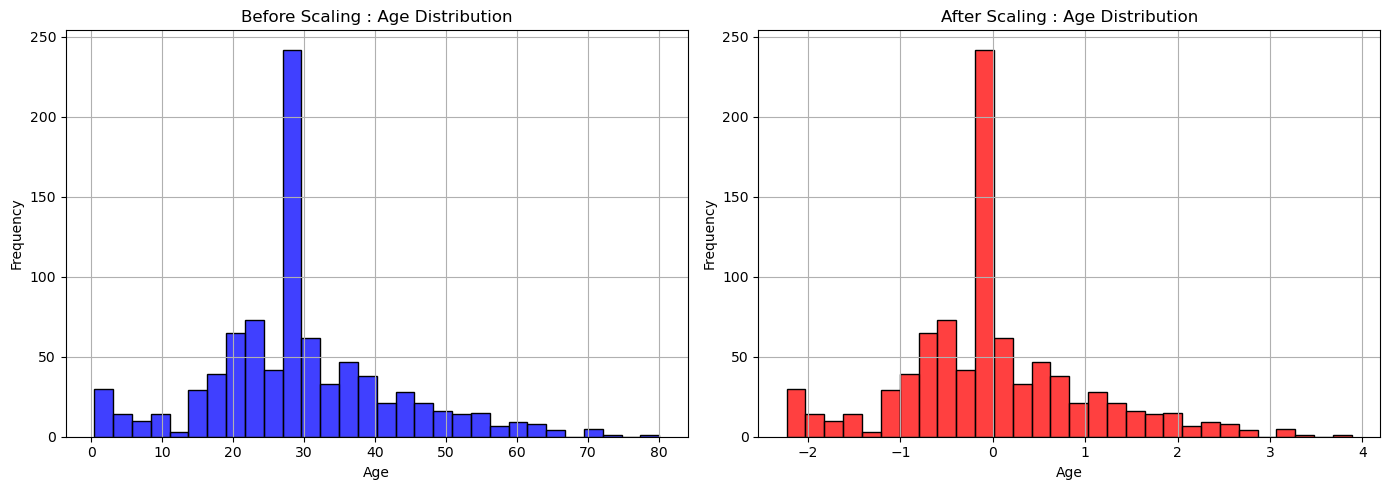

In [20]:
print("Before Scaling - Mean Age:", df_clean['age'].mean(), "Std Dev: ", df_clean['age'].std())
print("After Scaling - Mean Age:", df_scaled['age'].mean(), "Std Dev: ", df_scaled['age'].std())

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

sns.histplot(data=df_clean,x='age',ax=ax1,color='blue')
ax1.set_title('Before Scaling : Age Distribution')
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.grid(True) 

sns.histplot(data=df_scaled,x='age',ax=ax2,color='red')
ax2.set_title('After Scaling : Age Distribution')
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency")
ax2.grid(True) 

plt.tight_layout()   
plt.show()

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Age </h3>
</div>


<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<strong>Technical Note:</strong> The dataset contains 177 missing age group. To handle this issue, missing age values were imputed using the median age calculated separately for each gender, preserving demographic structure and eliminating all null age entries.
</div>


Before Scaling - Mean Age: 29.441268237934903 Std Dev:  13.018747116356971
After Scaling - Mean Age: 1.395566540494024e-16 Std Dev:  1.0005616400330457


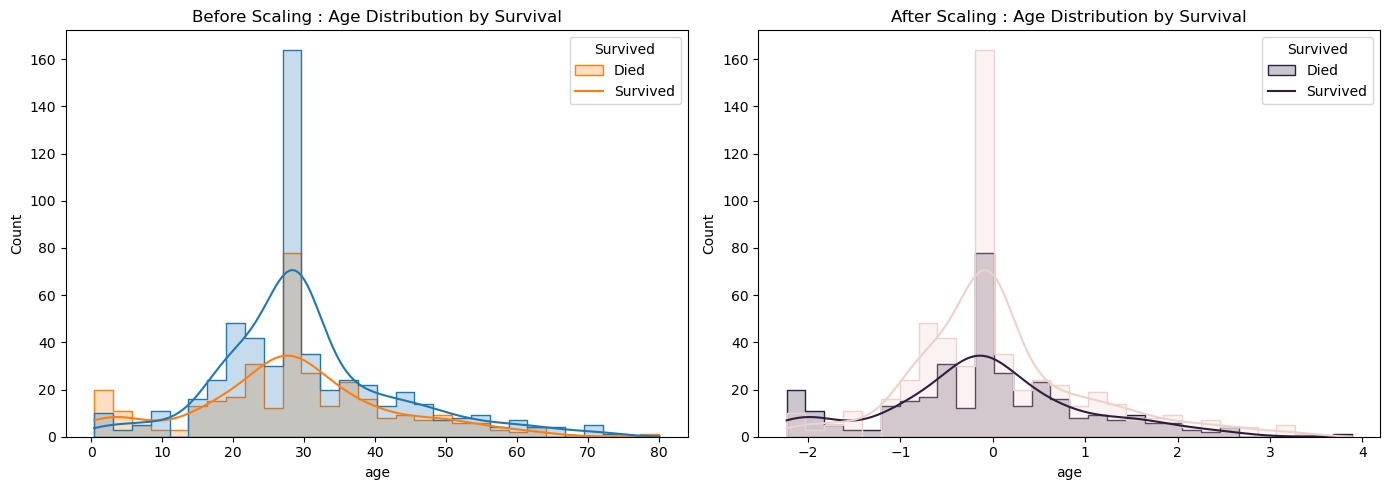

In [21]:
print("Before Scaling - Mean Age:", df_clean['age'].mean(), "Std Dev: ", df_clean['age'].std())
print("After Scaling - Mean Age:", df_scaled['age'].mean(), "Std Dev: ", df_scaled['age'].std())

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

sns.histplot(data=df_clean,x='age',hue='survived',bins=30,kde=True,element='step',ax=ax1)
ax1.set_title('Before Scaling : Age Distribution by Survival')
ax1.legend(title="Survived", labels=["Died", "Survived"])

sns.histplot(data=df_scaled,x='age',hue='survived',bins=30,kde=True,element='step',ax=ax2)
ax2.set_title('After Scaling : Age Distribution by Survival')
ax2.legend(title="Survived", labels=["Died", "Survived"])

plt.tight_layout()   
plt.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Scaling standardizes the age feature while preserving the relative differences between survivors and non-survivors. The overall distribution shape remains consistent, confirming that scaling prepares the feature for modeling without altering its relationship to survival.
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Age Group</h3>
</div>

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<strong>Technical Note:</strong> 
Passenger ages were discretized into meaningful age groups using predefined bins to simplify analysis and improve interpretability. A grouped count plot was then used to compare survival outcomes across age categories, with bar labels added to display exact passenger counts for clarity.
</div>


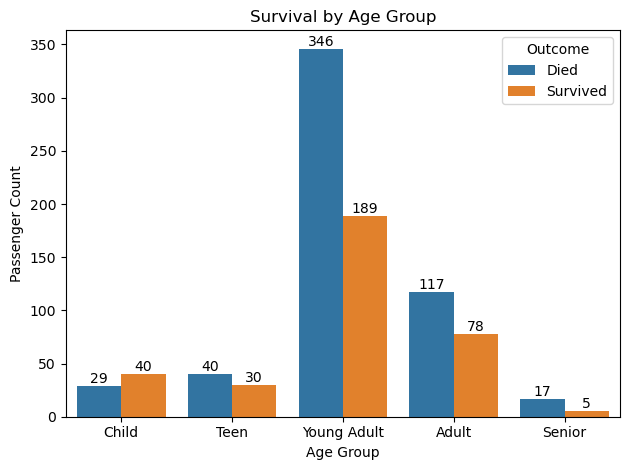

In [22]:
df_clean['age_group'] = pd.cut(
    df_clean['age'],
    bins=[0,12,18,35,60,100],
    labels=['Child','Teen','Young Adult','Adult','Senior']
)

ax = sns.countplot(x='age_group',hue='survived',data=df_clean) 

plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Passenger Count')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()    
plt.legend(title='Outcome', labels=['Died', 'Survived'])
plt.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Survival probability varies significantly by age. Children show higher survival rates, while older passengers have lower survival, which makes age an important predictive feature versus a global median
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Embarkation Port</h3>
</div>

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 8px; border-left: 5px solid #2e7d32;">
<strong>Technical Note:</strong> Two records contained missing embarkation ports. These values were imputed by randomly sampling from the existing embarkation categories to preserve the overall class distribution. The unique embarkation ports were first identified, after which rows with missing values were detected and assigned a randomly selected port using NumPy.
</div>


In [23]:
df_clean['embarked'].isna().sum()

np.int64(0)

In [24]:
ports = df_clean['embarked'].dropna().unique().tolist()          # ['S', 'C', 'Q']

df_clean.loc[df_clean['embarked'].isnull(), 'embarked'] = np.random.choice(ports, size=df_clean['embarked'].isnull().sum())
df_clean['embarked'].isna().sum()

np.int64(0)

Before Scaling - Mean Embarked : 1.5387205387205387 Std Dev:  0.7942307007937335
After Scaling - Mean Embarked: -3.588599675556062e-17 Std Dev:  1.0005616400330457


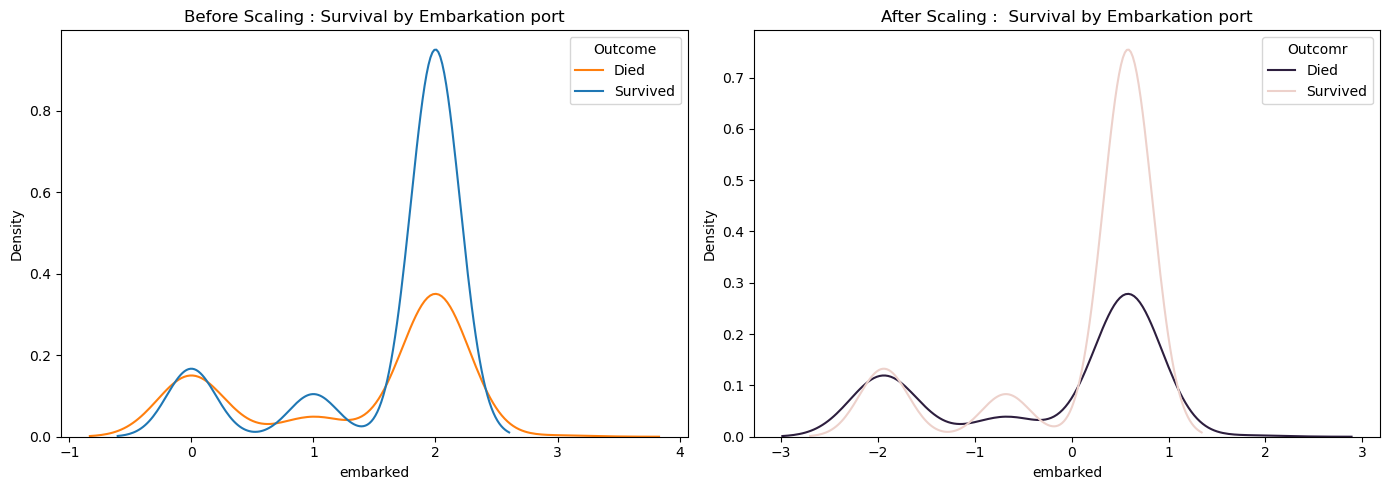

In [25]:


print("Before Scaling - Mean Embarked :", df_clean['embarked'].mean(), "Std Dev: ", df_clean['embarked'].std())
print("After Scaling - Mean Embarked:", df_scaled['embarked'].mean(), "Std Dev: ", df_scaled['embarked'].std())

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

sns.kdeplot(data=df_clean,x='embarked',hue='survived',ax=ax1)
ax1.set_title('Before Scaling : Survival by Embarkation port')
ax1.legend(title="Outcome", labels=["Died", "Survived"])

sns.kdeplot(data=df_scaled,x='embarked',hue='survived',ax=ax2)
ax2.set_title('After Scaling :  Survival by Embarkation port')
ax2.legend(title="Outcomr", labels=["Died", "Survived"])

plt.tight_layout()   
plt.show()

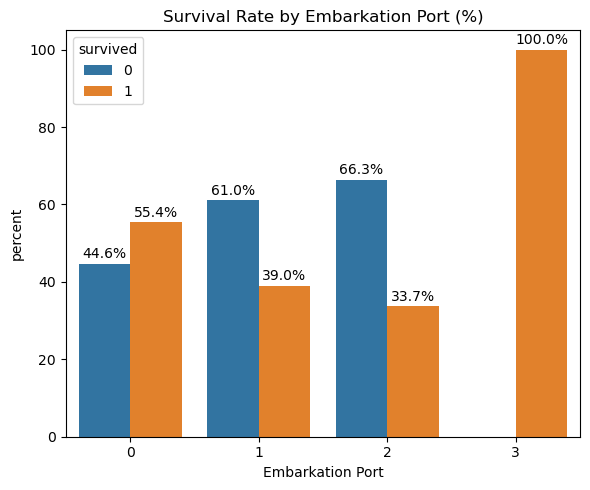

In [26]:
plt.figure(figsize=(6, 5))

counts = ( df_clean.groupby(['embarked', 'survived']).size().reset_index(name='count'))
counts['percent'] = (counts['count'] / counts.groupby('embarked')['count'].transform('sum') * 100)

ax = sns.barplot(x='embarked', y='percent', hue='survived',data=counts)
ax.set_title("Survival Rate by Embarkation Port (%)")
ax.set_xlabel("Embarkation Port")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.tight_layout()
plt.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Survival outcomes varied by embarkation port, likely due to differences in passenger demographics and class composition across ports. We can see from this that Cherbourg (C) → highest survival rate (~55%) where as Southampton (S) → lowest (~34%)</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Gender</h3>
</div>

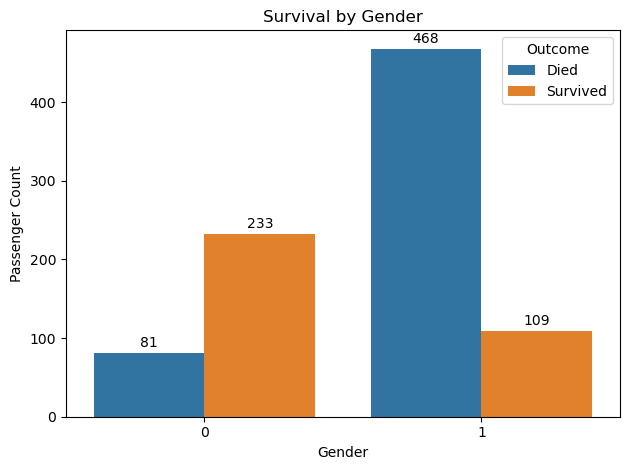

In [27]:
ax = sns.countplot(x='sex',hue='survived',data=df_clean)

ax.set_title("Survival by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Passenger Count")

for container in ax.containers:
    ax.bar_label(container, padding=2)

ax.legend(title='Outcome', labels=['Died', 'Survived'])
plt.tight_layout()    
plt.show()


In [28]:
print(df_clean.groupby('sex')['survived'].value_counts())
print(df_clean.groupby('sex')['survived'].mean() * 100)   # % survived per group

sex  survived
0    1           233
     0            81
1    0           468
     1           109
Name: count, dtype: int64
sex
0    74.203822
1    18.890815
Name: survived, dtype: float64


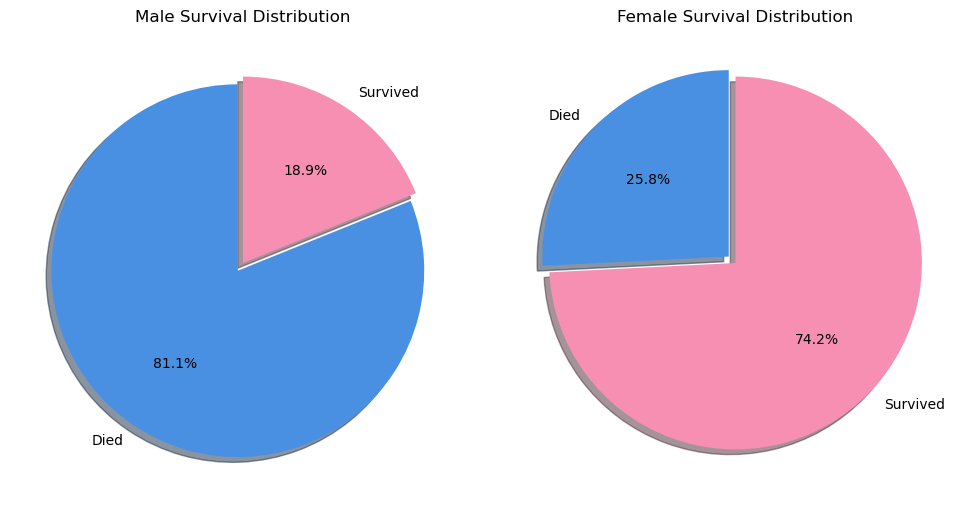

In [29]:
colors = ['#4a90e2', '#f78fb3']  # blue, pink

labels = ['Died', 'Survived']
male_counts = (df.loc[df['Sex'] == 'male', 'Survived'].value_counts().reindex([0, 1], fill_value=0))

female_counts = (df.loc[df['Sex'] == 'female', 'Survived'].value_counts().reindex([0, 1], fill_value=0))
#colors = ['#ff9999', '#66b3ff']   # red-ish / blue-ish

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Male
axes[0].pie(male_counts.values,labels=labels,autopct='%1.1f%%',startangle=90,colors=colors,shadow=True,explode=[0.05, 0])
axes[0].set_title('Male Survival Distribution')

# Female
axes[1].pie(female_counts.values,labels=labels,autopct='%1.1f%%',startangle=90,colors=colors,shadow=True,explode=[0.05, 0])
axes[1].set_title('Female Survival Distribution')

plt.tight_layout()
plt.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
It is striking to observe that the survival rate among females was dramatically higher than that of males. This strongly suggests that evacuation efforts prioritized women during the disaster.
</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Survival Analysis by Passenger Class</h3>
</div>

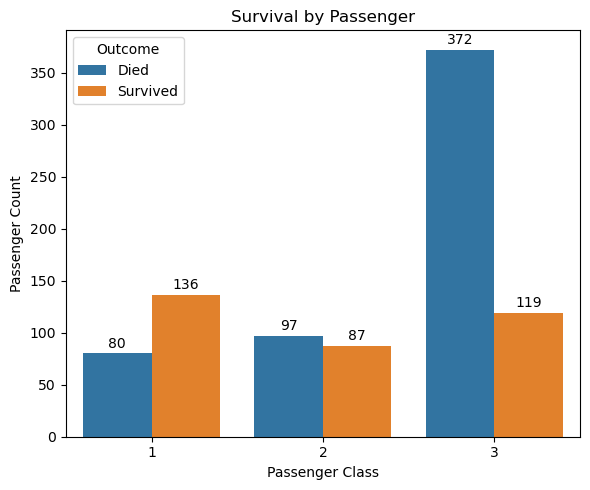

In [30]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x='pclass',hue='survived',data=df_clean)
ax.set_title("Survival by Passenger")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Passenger Count")

for container in ax.containers:
    ax.bar_label(container, padding=2)

ax.legend(title='Outcome', labels=['Died', 'Survived'])
plt.tight_layout()    
plt.show()


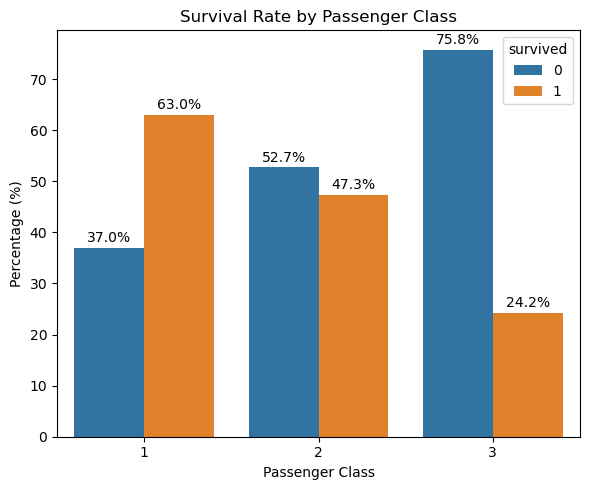

In [31]:
plt.figure(figsize=(6, 5))

counts = ( df_clean.groupby(['pclass', 'survived']).size().reset_index(name='count'))
counts['percent'] = (counts['count'] / counts.groupby('pclass')['count'].transform('sum') * 100)


ax = sns.barplot(x='pclass', y='percent', hue='survived',data=counts)
ax.set_title("Survival Rate by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Percentage (%)")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2)

plt.tight_layout()
plt.show()


<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Passengers traveling in first class were more likely to survive than those in lower classes, likely reflecting preferential access to evacuation resources</div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3>Min Max Scaling</h3>
</div>

In [35]:
df_clean.drop(columns=['column_name'], inplace=True)
scaler = MinMaxScaler() 
start_time = time.time() 
minmaxscaling = scaler.fit_transform(df_clean) 
end_time =time.time() 
elapsed_time = end_time - start_time
print(f"Time taken for Min Max Sacling: {elapsed_time:.6f} seconds") 
scaled_df = pd.DataFrame(minmaxscaling, columns = df_clean.columns) 
scaled_df

KeyError: "['age_group'] not found in axis"

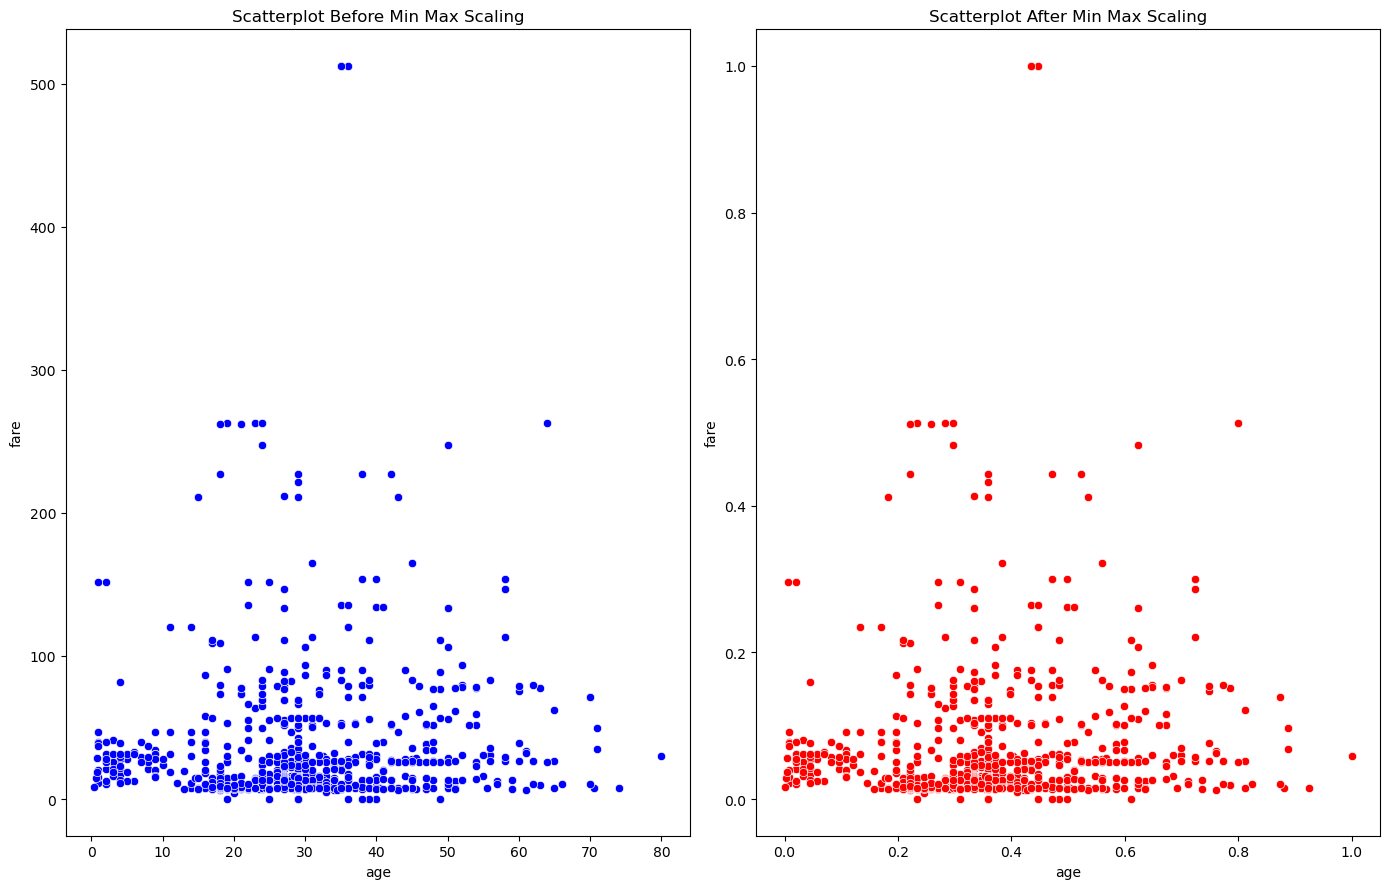

In [56]:
plt.figure(figsize=(14,9)) 
plt.subplot(1,2,1) 
plt.title("Scatterplot Before Min Max Scaling") 
sns.scatterplot(x ='age',y='fare',data=df_clean, color = "blue") 
plt.subplot(1,2,2) 
plt.title("Scatterplot After Min Max Scaling") 
sns.scatterplot(x ='age',y='fare',data=scaled_df, color = "red") 
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

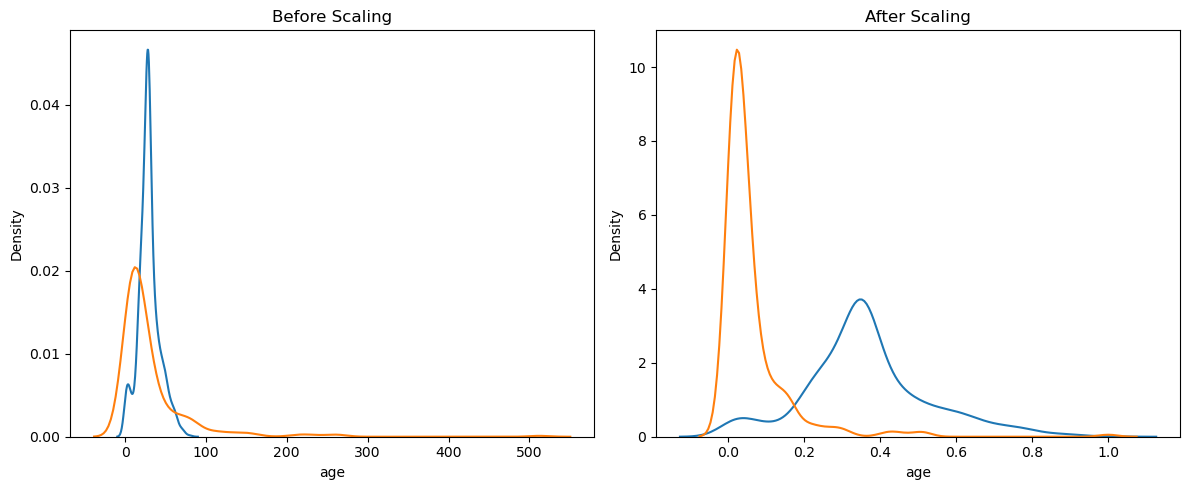

In [57]:
plt.figure(figsize=(14,7)) 


fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))
#plt.subplot(1,2,1) 
#plt.title("PDF Before Min Max Scaling") 
#sns.kdeplot(x ='age',y='fare',data=df_clean, color = "blue") 
ax1.set_title('Before Scaling')
sns.kdeplot(df_clean['age'],ax = ax1) 
sns.kdeplot(df_clean['fare'],ax = ax1)


#plt.subplot(1,2,2) 
#plt.title("PDF After Min Max Scaling") 
#sns.kdeplot(x ='age',y='fare',data=scaled_df, color = "red") 
ax2.set_title('After Scaling')
sns.kdeplot(scaled_df['age'],ax = ax2) 
sns.kdeplot(scaled_df['fare'],ax = ax2)


plt.tight_layout()
plt.show()

<div style="background-color: #f0f4f8; padding: 15px; border-radius: 8px; border-left: 5px solid #3498db;">
<strong>Observation:</strong>
Min–Max scaling compresses feature values into a 0–1 range while preserving the relative relationship between age and fare. The overall scatter pattern remains unchanged, confirming that scaling standardizes magnitude without altering feature relationships.
    </div>

<div style="border-bottom: 3px solid #64748b; padding: 8px 0; margin: 25px 0;">
<h3> ✅ Final Summary </h3></div>

- Gender, passenger class, and age are the strongest predictors of survival.
- Females and children exhibited higher survival rates.
- Higher passenger class correlated with increased survival likelihood.
- Embarkation port showed secondary effects likely driven by class composition.
